In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Linear regression baseline

In [2]:
from src.training import lr_grid
from src.models import LinearRegressionModel
from src.dataset import get_abalone_dataloaders
from src.constants import ABALONE_TOTAL_FEATURES
from tqdm import tqdm

import torch

lr_grid_values = [0.00001, 0.00005, 0.0001,0.0005, 0.001, 0.005 , 0.01, 0.05, 0.1,0.5,1]

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train_loader, test_loader = get_abalone_dataloaders(batch_size=-1, num_workers=4, pin_memory=True)

model = LinearRegressionModel(
    input_dim=ABALONE_TOTAL_FEATURES,
    output_dim=1,
    hidden_dim=[],
    relu_activation=False,
    initializer=None,
)
model.to(device)

loss = torch.nn.MSELoss()

train_loss_list, val_loss_list, val_metric_list = lr_grid(
    model, train_loader, test_loader, loss, loss, lr_grid_values, 100, device
)


number of training samples: 3341
number of testing samples: 836


100%|██████████| 11/11 [00:06<00:00,  1.77it/s]


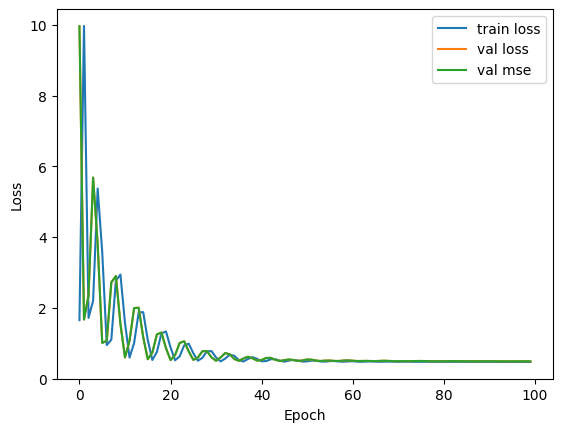

In [3]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(train_loss_list, label="train loss")
plt.plot(val_loss_list, label="val loss")
plt.plot(val_metric_list, label="val mse")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.legend()
plt.show()


# 1 to 3 layers of pure linear regression

number of training samples: 3341
number of testing samples: 836


100%|██████████| 9/9 [00:02<00:00,  3.32it/s]


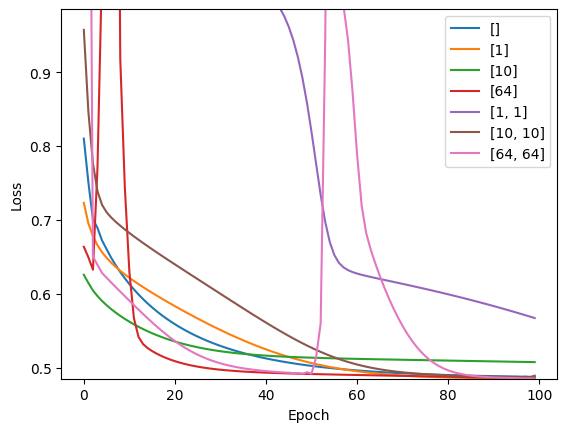

Best model is [1]
Min loss is 0.48524779081344604


In [4]:
from src.training import lr_grid
from src.models import LinearRegressionModel
from src.dataset import get_abalone_dataloaders
from src.constants import ABALONE_TOTAL_FEATURES

import torch

lr_grid_values = [0.00001, 0.00005, 0.0001,0.0005, 0.001, 0.005 , 0.01, 0.05, 0.1]

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train_loader, test_loader = get_abalone_dataloaders(batch_size=-1, num_workers=4, pin_memory=True)

hidden_dim_list = [
    [],
    [1],
    [10],
    [64],
    [1, 1],
    [10, 10],
    [64, 64],
]

models = [LinearRegressionModel(
    input_dim=ABALONE_TOTAL_FEATURES,
    output_dim=1,
    hidden_dim=hidden_dim,
    relu_activation=False,
    initializer=None,
) for hidden_dim in hidden_dim_list]

val_loss_models = []
for model in models:
    model.to(device)

    loss = torch.nn.MSELoss()

    train_loss_list, val_loss_list, val_metric_list = lr_grid(
        model, train_loader, test_loader, loss, loss, lr_grid_values, 100, device
    )
    val_loss_models.append(val_loss_list)


import matplotlib.pyplot as plt
import numpy as np

for i, val_loss in enumerate(val_loss_models):
    plt.plot(val_loss, label=str(hidden_dim_list[i]))

plt.xlabel("Epoch")
plt.ylabel("Loss")
min_value = min(min(val_loss) for val_loss in val_loss_models)
plt.ylim(min_value,min_value+0.5)
plt.legend()
plt.show()

print("Best model is", hidden_dim_list[np.argmin([val_loss[-1] for val_loss in val_loss_models])])
print("Min loss is", min([val_loss[-1] for val_loss in val_loss_models]))



number of training samples: 3341
number of testing samples: 836


100%|██████████| 9/9 [00:02<00:00,  3.84it/s]


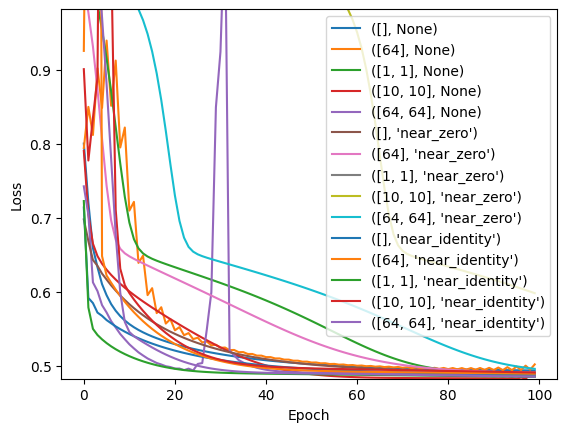

Best model is ([1, 1], 'near_identity')
Min loss is 0.4847005605697632


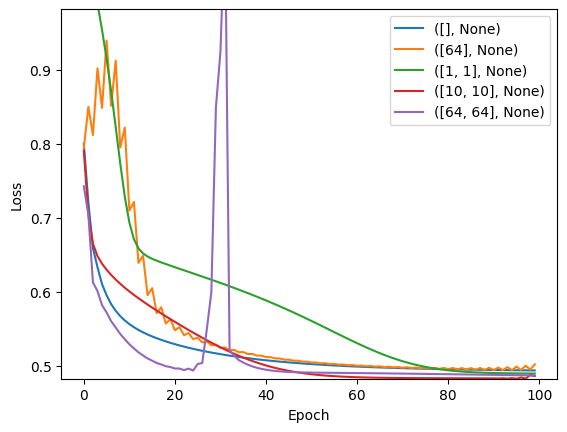

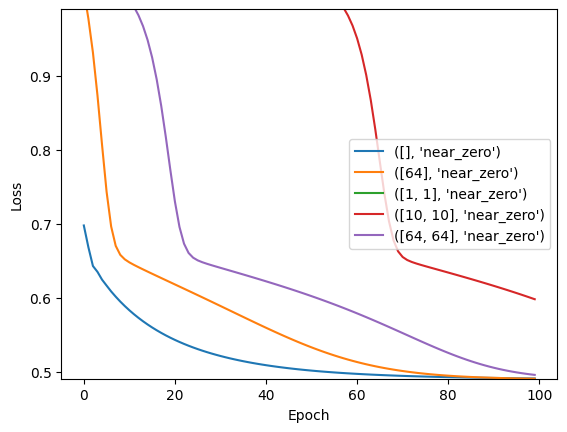

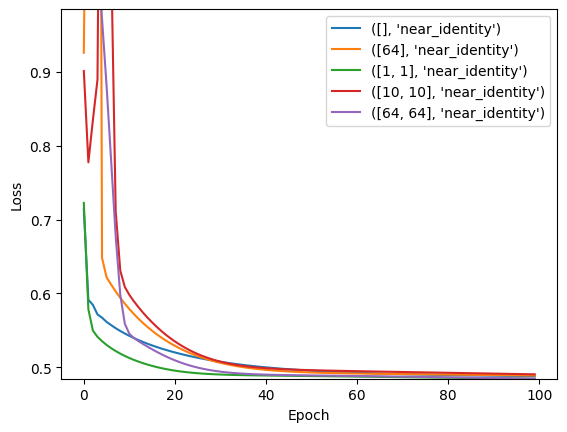

In [5]:

from src.training import lr_grid
from src.models import LinearRegressionModel
from src.dataset import get_abalone_dataloaders
from src.constants import ABALONE_TOTAL_FEATURES

import torch

lr_grid_values = [0.00001, 0.00005, 0.0001,0.0005, 0.001, 0.005 , 0.01, 0.05, 0.1]

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train_loader, test_loader = get_abalone_dataloaders(batch_size=-1, num_workers=4, pin_memory=True)

hidden_dim_init_list = [
    ([], None),
    # ([1], None),
    # ([10], None),
    ([64], None),
    ([1, 1], None),
    ([10, 10], None),
    ([64, 64], None),
    ([], "near_zero"),
    # ([1], "near_zero"),
    # ([10], "near_zero"),
    ([64], "near_zero"),
    ([1, 1], "near_zero"),
    ([10, 10], "near_zero"),
    ([64, 64], "near_zero"),
    ([], "near_identity"),
    # ([1], "near_identity"),
    # ([10], "near_identity"),
    ([64], "near_identity"),
    ([1, 1], "near_identity"),
    ([10, 10], "near_identity"),
    ([64, 64], "near_identity"),
]

models = [LinearRegressionModel(
    input_dim=ABALONE_TOTAL_FEATURES,
    output_dim=1,
    hidden_dim=hidden_dim,
    relu_activation=False,
    initializer=init,
) for hidden_dim, init in hidden_dim_init_list]

val_loss_models = []
for model in models:
    model.to(device)

    loss = torch.nn.MSELoss()

    train_loss_list, val_loss_list, val_metric_list = lr_grid(
        model, train_loader, test_loader, loss, loss, lr_grid_values, 100, device, optimizer_type="SGD"
    )
    val_loss_models.append(val_loss_list)


import matplotlib.pyplot as plt
import numpy as np

for i, val_loss in enumerate(val_loss_models):
    plt.plot(val_loss, label=str(hidden_dim_init_list[i]))

plt.xlabel("Epoch")
plt.ylabel("Loss")
min_value = min(min(val_loss) for val_loss in val_loss_models)
plt.ylim(min_value,min_value+0.5)
plt.legend()
plt.show()

print("Best model is", hidden_dim_init_list[np.argmin([val_loss[-1] for val_loss in val_loss_models])])
print("Min loss is", min([val_loss[-1] for val_loss in val_loss_models]))


n_init = 5
separate_val_loss = [val_loss_models[:5], val_loss_models[5:10], val_loss_models[10:]]
for k, val_loss_group in enumerate(separate_val_loss):
    for i, val_loss_ in enumerate(val_loss_group):
        plt.plot(val_loss_, label=str(hidden_dim_init_list[k*n_init + i]))

    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    min_value = min(min(val_loss_) for val_loss_ in val_loss_group)
    plt.ylim(min_value,min_value+0.5)
    plt.legend()
    plt.show()


Near identity seems to be more stable and quicker to converge.

number of training samples: 3341
number of testing samples: 836


  0%|          | 0/9 [00:00<?, ?it/s]

100%|██████████| 9/9 [00:02<00:00,  3.15it/s]


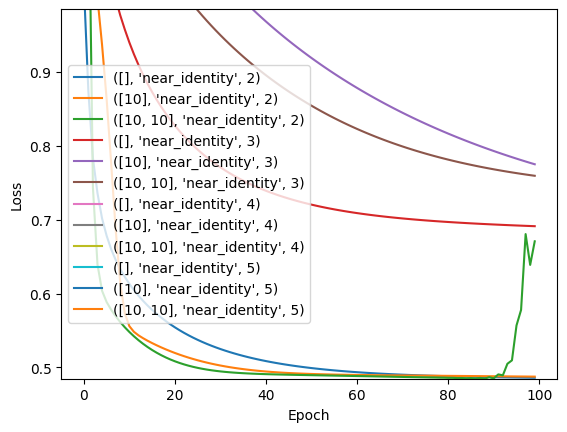

Best model is ([], 'near_identity', 2)
Min loss is 0.48604267835617065


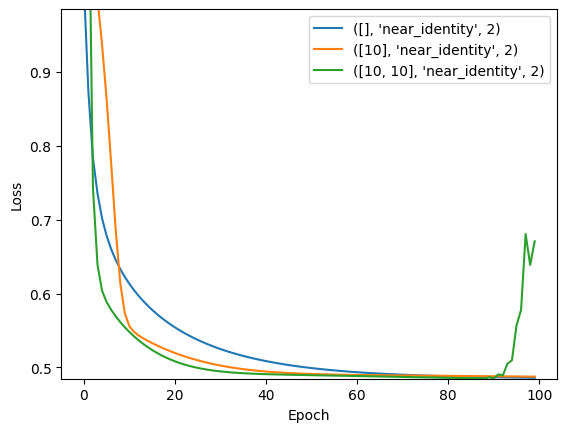

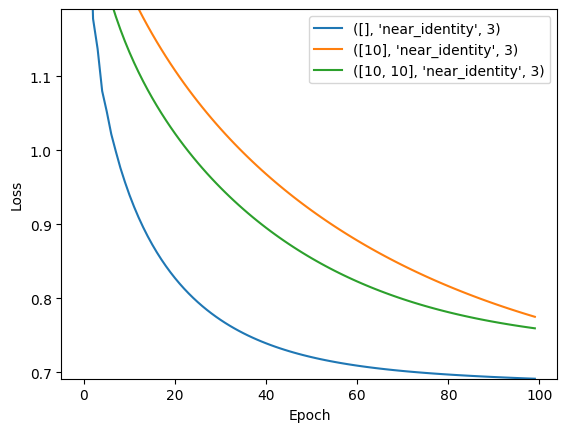

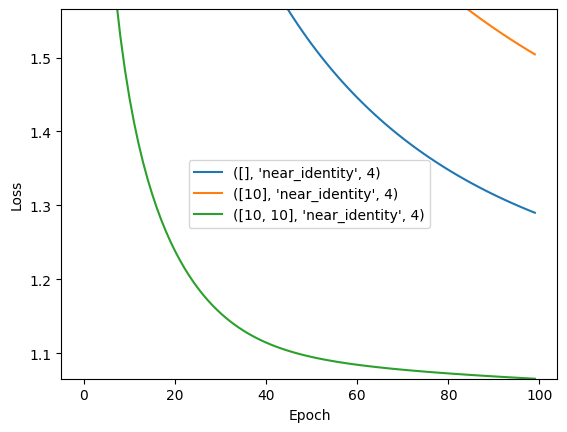

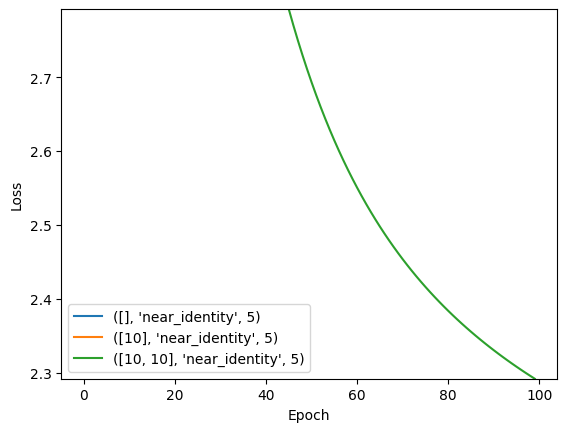

In [7]:

from src.training import lr_grid
from src.loss import LpLoss
from src.models import LinearRegressionModel
from src.dataset import get_abalone_dataloaders
from src.constants import ABALONE_TOTAL_FEATURES

import torch

lr_grid_values = [0.00001, 0.00005, 0.0001,0.0005, 0.001, 0.005 , 0.01, 0.05, 0.1]

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train_loader, test_loader = get_abalone_dataloaders(batch_size=-1, num_workers=4, pin_memory=True)
metric = torch.nn.MSELoss()

hidden_dim_init_list = [
    ([], "near_identity", 2),
    ([10], "near_identity", 2),
    ([10, 10], "near_identity", 2),
    ([], "near_identity", 3),
    ([10], "near_identity", 3),
    ([10, 10], "near_identity", 3),
    ([], "near_identity", 4),
    ([10], "near_identity", 4),
    ([10, 10], "near_identity", 4),
    ([], "near_identity", 5),
    ([10], "near_identity", 5),
    ([10, 10], "near_identity", 5),
]

models_loss = [(LinearRegressionModel(
    input_dim=ABALONE_TOTAL_FEATURES,
    output_dim=1,
    hidden_dim=hidden_dim,
    relu_activation=False,
    initializer=init,
), LpLoss(p=loss_p)) for hidden_dim, init, loss_p in hidden_dim_init_list]

val_loss_models = []
for model, loss in models_loss:
    model.to(device)


    train_loss_list, val_loss_list, val_metric_list = lr_grid(
        model, train_loader, test_loader, loss, metric, lr_grid_values, 100, device, optimizer_type="SGD"
    )
    val_loss_models.append(val_loss_list)


import matplotlib.pyplot as plt
import numpy as np

for i, val_loss in enumerate(val_loss_models):
    plt.plot(val_loss, label=str(hidden_dim_init_list[i]))

plt.xlabel("Epoch")
plt.ylabel("Loss")
min_value = min(min(val_loss) for val_loss in val_loss_models)
plt.ylim(min_value,min_value+0.5)
plt.legend()
plt.show()

print("Best model is", hidden_dim_init_list[np.argmin([val_loss[-1] for val_loss in val_loss_models])])
print("Min loss is", min([val_loss[-1] for val_loss in val_loss_models]))


n_group = 3
separate_val_loss = [
    val_loss_models[:n_group],
    val_loss_models[n_group:2*n_group],
    val_loss_models[2*n_group:3*n_group],
    val_loss_models[3*n_group:],
]
for k, val_loss_group in enumerate(separate_val_loss):
    for i, val_loss_ in enumerate(val_loss_group):
        plt.plot(val_loss_, label=str(hidden_dim_init_list[k*n_group + i]))

    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    min_value = min(min(val_loss_) for val_loss_ in val_loss_group)
    plt.ylim(min_value,min_value+0.5)
    plt.legend()
    plt.show()


The acceleration of convergence might be greater with Lp loss but if we monitor the L2 metric, it is far from being as good as the L2 loss.

# Adam optimizer

number of training samples: 3341
number of testing samples: 836


100%|██████████| 9/9 [00:02<00:00,  3.45it/s]


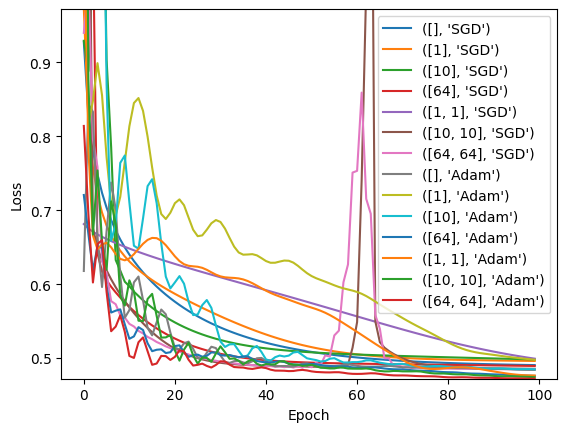

Best model is ([64, 64], 'Adam')
Min loss is 0.47210177779197693


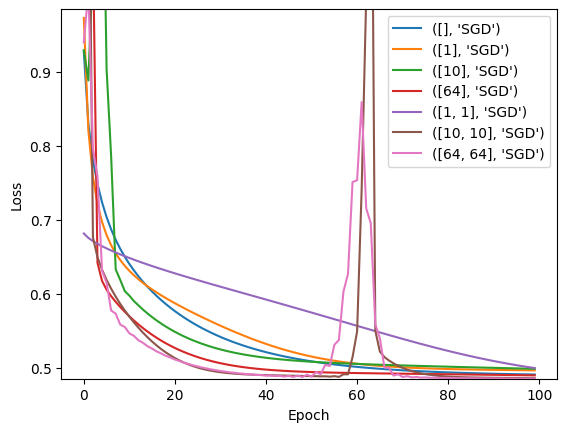

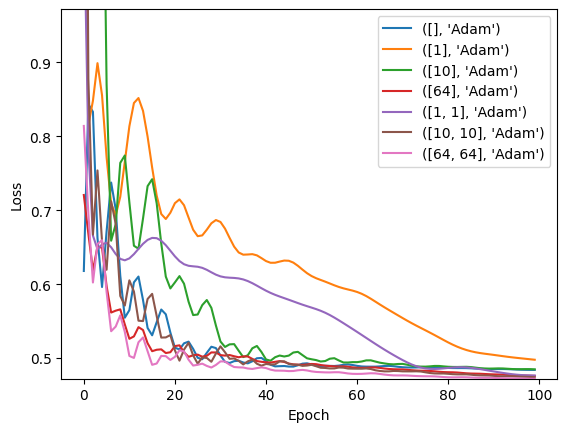

In [10]:
from src.training import lr_grid
from src.models import LinearRegressionModel
from src.dataset import get_abalone_dataloaders
from src.constants import ABALONE_TOTAL_FEATURES

import torch

lr_grid_values = [0.00001, 0.00005, 0.0001,0.0005, 0.001, 0.005 , 0.01, 0.05, 0.1]

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train_loader, test_loader = get_abalone_dataloaders(batch_size=-1, num_workers=4, pin_memory=True)

hidden_dim_optimizer_list = [
    ([], "SGD"),
    ([1], "SGD"),
    ([10], "SGD"),
    ([64], "SGD"),
    ([1, 1], "SGD"),
    ([10, 10], "SGD"),
    ([64, 64], "SGD"),
    ([], "Adam"),
    ([1], "Adam"),
    ([10], "Adam"),
    ([64], "Adam"),
    ([1, 1], "Adam"),
    ([10, 10], "Adam"),
    ([64, 64], "Adam"),
]

models_optimizer = [(LinearRegressionModel(
    input_dim=ABALONE_TOTAL_FEATURES,
    output_dim=1,
    hidden_dim=hidden_dim,
    relu_activation=False,
    initializer="near_identity",
), optimizer_type) for hidden_dim, optimizer_type in hidden_dim_optimizer_list]

val_loss_models = []
for model, optimizer_type in models_optimizer:
    model.to(device)

    loss = torch.nn.MSELoss()

    train_loss_list, val_loss_list, val_metric_list = lr_grid(
        model, train_loader, test_loader, loss, loss, lr_grid_values, 100, device, optimizer_type=optimizer_type
    )
    val_loss_models.append(val_loss_list)


import matplotlib.pyplot as plt
import numpy as np

for i, val_loss in enumerate(val_loss_models):
    plt.plot(val_loss, label=str(hidden_dim_optimizer_list[i]))

plt.xlabel("Epoch")
plt.ylabel("Loss")
min_value = min(min(val_loss) for val_loss in val_loss_models)
plt.ylim(min_value,min_value+0.5)
plt.legend()
plt.show()

print("Best model is", hidden_dim_optimizer_list[np.argmin([val_loss[-1] for val_loss in val_loss_models])])
print("Min loss is", min([val_loss[-1] for val_loss in val_loss_models]))

n_group = 7

separate_val_loss = [
    val_loss_models[:n_group],
    val_loss_models[n_group:2*n_group],
]
for k, val_loss_group in enumerate(separate_val_loss):
    for i, val_loss_ in enumerate(val_loss_group):
        plt.plot(val_loss_, label=str(hidden_dim_optimizer_list[k*n_group + i]))

    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    min_value = min(min(val_loss_) for val_loss_ in val_loss_group)
    plt.ylim(min_value,min_value+0.5)
    plt.legend()
    plt.show()



Adam seems less stable but quicker to converge.

Only having 1 neuron in the hidden layers produces a very slow convergence.

number of training samples: 3341
number of testing samples: 836


100%|██████████| 9/9 [00:02<00:00,  4.43it/s]


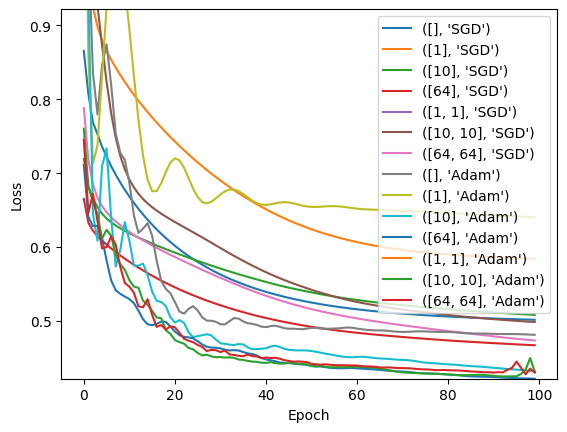

Best model is ([64], 'Adam')
Min loss is 0.4218708276748657


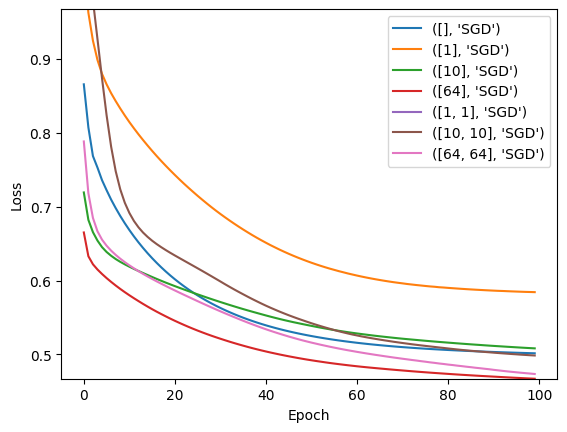

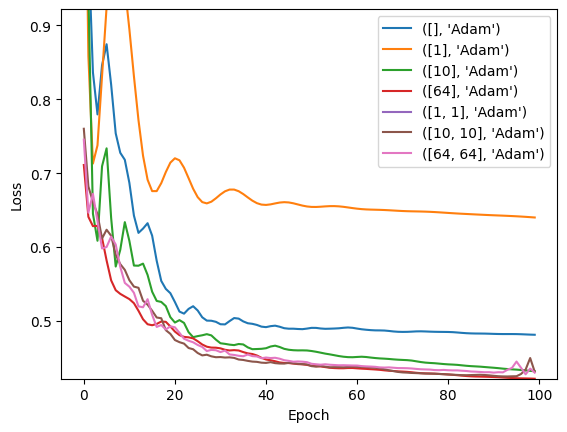

In [1]:
from src.training import lr_grid
from src.models import LinearRegressionModel
from src.dataset import get_abalone_dataloaders
from src.constants import ABALONE_TOTAL_FEATURES

import torch

lr_grid_values = [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train_loader, test_loader = get_abalone_dataloaders(
    batch_size=-1, num_workers=4, pin_memory=True
)

hidden_dim_optimizer_list = [
    ([], "SGD"),
    ([1], "SGD"),
    ([10], "SGD"),
    ([64], "SGD"),
    ([1, 1], "SGD"),
    ([10, 10], "SGD"),
    ([64, 64], "SGD"),
    ([], "Adam"),
    ([1], "Adam"),
    ([10], "Adam"),
    ([64], "Adam"),
    ([1, 1], "Adam"),
    ([10, 10], "Adam"),
    ([64, 64], "Adam"),
]

models_optimizer = [
    (
        LinearRegressionModel(
            input_dim=ABALONE_TOTAL_FEATURES,
            output_dim=1,
            hidden_dim=hidden_dim,
            relu_activation=True,
            initializer="near_identity",
        ),
        optimizer_type,
    )
    for hidden_dim, optimizer_type in hidden_dim_optimizer_list
]

val_loss_models = []
for model, optimizer_type in models_optimizer:
    model.to(device)

    loss = torch.nn.MSELoss()

    train_loss_list, val_loss_list, val_metric_list = lr_grid(
        model,
        train_loader,
        test_loader,
        loss,
        loss,
        lr_grid_values,
        100,
        device,
        optimizer_type=optimizer_type,
    )
    val_loss_models.append(val_loss_list)


import matplotlib.pyplot as plt
import numpy as np

for i, val_loss in enumerate(val_loss_models):
    plt.plot(val_loss, label=str(hidden_dim_optimizer_list[i]))

plt.xlabel("Epoch")
plt.ylabel("Loss")
min_value = min(min(val_loss) for val_loss in val_loss_models)
plt.ylim(min_value, min_value + 0.5)
plt.legend()
plt.show()

print(
    "Best model is",
    hidden_dim_optimizer_list[
        np.argmin([val_loss[-1] for val_loss in val_loss_models])
    ],
)
print("Min loss is", min([val_loss[-1] for val_loss in val_loss_models]))

n_group = 7

separate_val_loss = [
    val_loss_models[:n_group],
    val_loss_models[n_group : 2 * n_group],
]
for k, val_loss_group in enumerate(separate_val_loss):
    for i, val_loss_ in enumerate(val_loss_group):
        plt.plot(val_loss_, label=str(hidden_dim_optimizer_list[k * n_group + i]))

    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    min_value = min(min(val_loss_) for val_loss_ in val_loss_group)
    plt.ylim(min_value, min_value + 0.5)
    plt.legend()
    plt.show()

Much better convergence with Adam and non linearity.